In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import time
from pypylon import pylon

(1088, 2048)
TIME:  0.053920745849609375


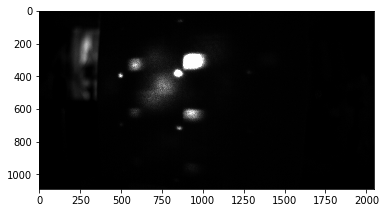

In [22]:
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()
#new_width = camera.Width.GetValue() - camera.Width.GetInc()
#if new_width >= camera.Width.GetMin():
#    camera.Width.SetValue(new_width)

camera.OffsetX.SetValue(0)
camera.OffsetY.SetValue(0)
camera.Width.SetValue(2048)
camera.Height.SetValue(1088)
numberOfImagesToGrab = 1
camera.StartGrabbingMax(numberOfImagesToGrab)
time_start = time.time()


while camera.IsGrabbing():
   
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # Access the image data.
        img = np.asarray(grabResult.Array) #.reshape((grabResult.Height, grabResult.Width))
        
        print(img.shape)

        

    time2 = time.time()
    print("TIME: ", time2-time_start)
    ##Wait statements
    #time.sleep(5)
    #input("Press Enter to continue...")

    grabResult.Release()
    
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()    
camera.Close()


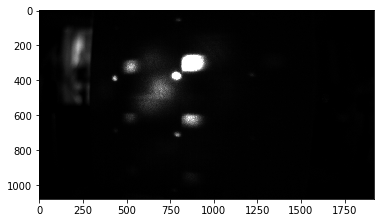

In [23]:
target = img[4:1084,64:1984]
np.save('target_intensity', target)

img = np.load('target_intensity.npy')
plt.imshow(target, cmap='gray', vmin=0, vmax=255)
plt.show()

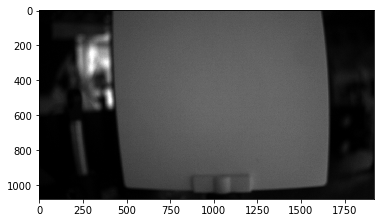

In [21]:
plt.imshow(img[4:1084,64:1984], cmap='gray', vmin=0, vmax=255)